In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    vW1=np.zeros_like(W1)
    vb1=np.zeros_like(b1)
    vW2=np.zeros_like(W2)
    vb2=np.zeros_like(b2)
    return W1, b1, W2, b2, vW1, vb1, vW2, vb2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, vW1, vb1, vW2, vb2, beta, alpha):
    vW1 = beta * vW1 + (1 - beta) * dW1
    vb1 = beta * vb1 + (1 - beta) * db1
    vW2 = beta * vW2 + (1 - beta) * dW2
    vb2 = beta * vb2 + (1 - beta) * db2
    W1 = W1 - alpha * vW1
    b1 = b1 - alpha * vb1 
    W2 = W2 - alpha * vW2
    b2 = b2 - alpha * vb2 
    return W1, b1, W2, b2, vW1, vb1, vW2, vb2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, beta, iterations):
    W1, b1, W2, b2, vW1, vb1, vW2, vb2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2, vW1, vb1, vW2, vb2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, vW1, vb1, vW2, vb2, beta, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, vW1, vb1, vW2, vb2

In [18]:
W1, b1, W2, b2, vW1, vb1, vW2, vb2 = gradient_descent(X_train, Y_train, 0.10, 0.2, 500)

Iteration:  0
[0 4 0 ... 3 4 8] [0 4 7 ... 1 8 9]
0.10873170731707317
Iteration:  10
[0 8 8 ... 3 8 8] [0 4 7 ... 1 8 9]
0.17429268292682926
Iteration:  20
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.246
Iteration:  30
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.2722439024390244
Iteration:  40
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.2945609756097561
Iteration:  50
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.317609756097561
Iteration:  60
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.3425609756097561
Iteration:  70
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.36773170731707316
Iteration:  80
[0 0 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.39478048780487807
Iteration:  90
[0 6 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.4191463414634146
Iteration:  100
[0 9 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.44382926829268293
Iteration:  110
[0 9 8 ... 1 8 8] [0 4 7 ... 1 8 9]
0.4738292682926829
Iteration:  120
[0 9 9 ... 1 8 8] [0 4 7 ... 1 8 9]
0.5141707317073171
Iteration:  130
[0 4 9 ... 1 8 8] [0 4 7 ... 1 8 9]
0.5739512195121951
Iteration:  140
[0 4 7 ...

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


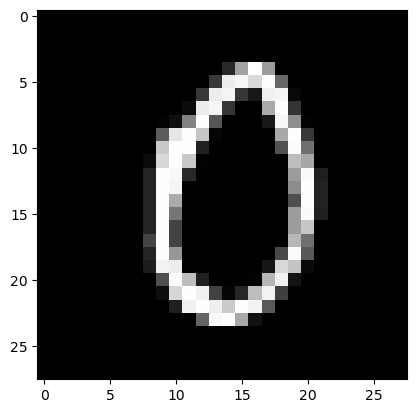

In [25]:
test_prediction(0, W1, b1, W2, b2)

In [ ]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)